<a href="https://colab.research.google.com/github/jihanghaniyyah/knn-study/blob/main/diabetes_kNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Diabetes Classification using K-NN
**3122640035**

# 1. Get and Read Dataset

In [46]:
import pandas as pd
diabetes_data = pd.read_csv("diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
print(diabetes_data.columns.values)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


In [48]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [49]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [50]:
x = diabetes_data.drop(["Outcome"], axis = 1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [51]:
y = diabetes_data["Outcome"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# 2. Dataset Preparation

**Splitting Data into Train and Test Sets**

In [52]:
#Split data into training and validation set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 123)

**Feature Scaling for Classification**

In [53]:
#from sklearn.preprocessing import StandardScaler  
#scaler = StandardScaler()  
#scaler.fit(x_train)

#x_train = scaler.transform(x_train)  
#x_test = scaler.transform(x_test)

# 3. Training

**Training and Predicting for Classification**

In [54]:
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors=2) 
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(y_pred)

[1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 0 0]


**Evaluating KNN for Classification**

In [55]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[134   9]
 [ 58  30]]
              precision    recall  f1-score   support

           0       0.70      0.94      0.80       143
           1       0.77      0.34      0.47        88

    accuracy                           0.71       231
   macro avg       0.73      0.64      0.64       231
weighted avg       0.73      0.71      0.68       231



The results show that kNN was able to classify 231 records in the test sets with 71% accuracy without feature scaling.

# 4. Finding the Best K

###Mean Absolute Error

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.29004329004329005
mse: 0.29004329004329005
rmse: 0.5385566730097122


From the output, we can see that the MAE and MSE score are the lowest.

**Create a for loop to run models that have from 1 to X neighbors and plot the Mean Error values against K values**

Text(0, 0.5, 'Mean Error')

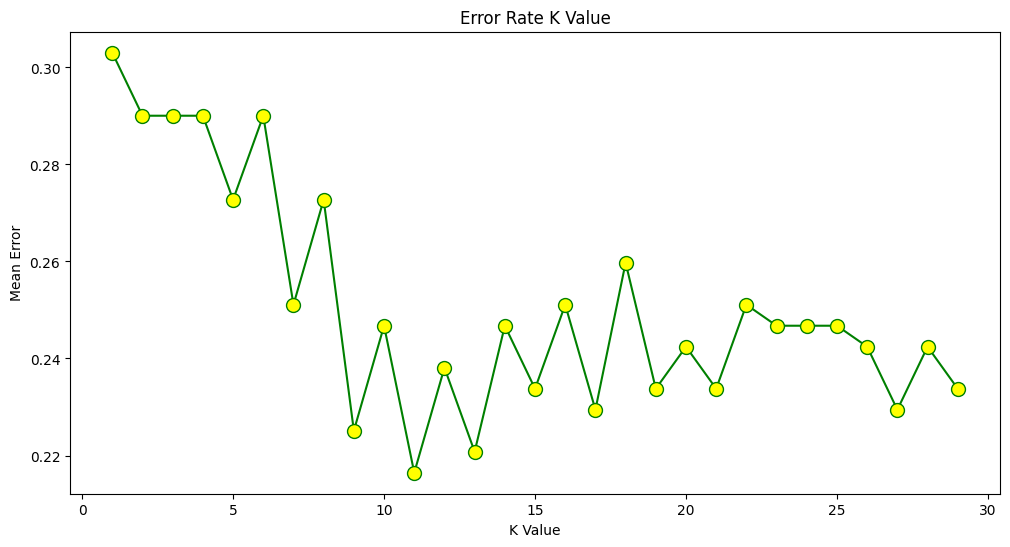

In [57]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

error = []

for i in range(1,30):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    pred_i = knn.predict(x_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='green', linestyle='-', marker='o', markerfacecolor='yellow', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the output, we can see that the Mean Error score is the lowest when the value of the K is 11.

**Retrain the classifier with 3 neighors**

In [58]:
from sklearn.neighbors import KNeighborsClassifier #import library KNN from sklearn
classifier1 = KNeighborsClassifier(n_neighbors=11) #menentukan nilai k(banyaknya tetangga terdekat yg menjadi acuan klasifikasi) 
classifier1.fit(x_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix  
y_pred2 = classifier1.predict(x_test)
print(classification_report(y_test, y_pred2))  


              precision    recall  f1-score   support

           0       0.79      0.88      0.83       143
           1       0.76      0.62      0.69        88

    accuracy                           0.78       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



The results show that kNN was able to classify 231 records in the test sets with 78% accuracy.

###F1 Score

**Create a for loop to run models that have from 1 to X neighbors and plot the F1 Score values against K values**

Text(0, 0.5, 'F1 Score')

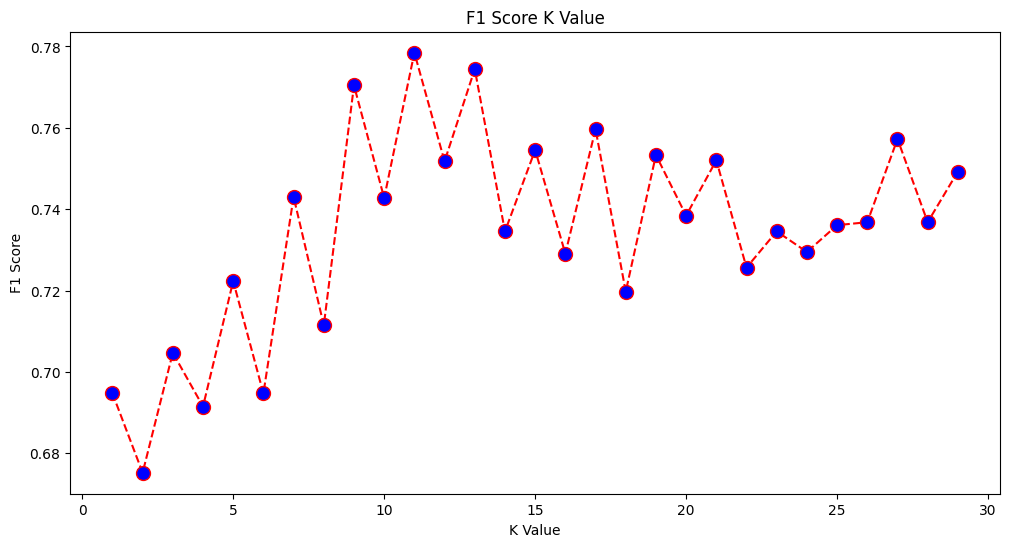

In [59]:
from sklearn.metrics import f1_score

f1s = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

From the output, we can see that the F1 score is the higher when the value of the K is 11.

**Retrain the classifier with 3 neighbors**

In [60]:
from sklearn.neighbors import KNeighborsClassifier 
classifier1 = KNeighborsClassifier(n_neighbors=11) 
classifier1.fit(x_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix  
y_pred3 = classifier1.predict(x_test)
print(confusion_matrix(y_test, y_pred3))  
print(classification_report(y_test, y_pred3)) 

[[126  17]
 [ 33  55]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       143
           1       0.76      0.62      0.69        88

    accuracy                           0.78       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



The results show that kNN was able to classify 231 records in the test sets with 78% accuracy.